The Swedish CARdioPulmonary Bioimage Study (SCAPIS) found that more than 40% of the middle aged adults studied had a coronary artery disease without their knowledge. According to the government of Canada, heart disease is the second leading cause of death among Canadians. Thus, being able to identify the presence of a heart condition as early as possible is incredibly important in the medical field. In this project, we ask:Can we predict whether a patient is suffering from a heart disease based on their medical history? In order to answer this question, we will build a classification model using 4 datasets sourced from The UCI Machine Learning Repository. These datasets were created by The Hungarian Institute of Cariology, The University Hospitals in Basel and Zurich Switzerland, as well as The V.A Medical Center, Long Beach and Cleveland Clinic Foundation. Each dataset has 14 columns that represent different types of patient information and were combined to create a much larger dataset composed of data from all 4 sources with 997 rows and 15 columns (extra column added to indicate where row was sourced from). The other columns in our dataset are as follows:

 Age: 
age of the individual (years)

 Sex: 
gender of the individual 1 = male 0 = female

Chest-pain type: 
type of chest-pain experienced by the individual 
1 = typical angina, 2 = atypical angina, 3 = non anginal pain, 4 = asymptotic

Resting Blood Pressure: 
resting blood pressure value of an individual (in mmHg)

Serum Cholesterol: 
serum cholesterol (mg/dl unit)

Fasting Blood Sugar: 
compares the fasting blood sugar value of an individual with 120 mg/dl. 
If fasting blood sugar > 120 mg/dl then : 1 (true), else : 0 (false)

Resting ECG : 
resting electrocardiographic results 
(0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hypertrophy)

Max heart rate achieved : 
max heart rate achieved by an individual.

 Exercise induced angina 
1 = yes, 0 = no

ST depression induced by exercise relative to rest: 
displays the value which is an integer or float.

Peak exercise ST segment : 
1 = upsloping 2 = flat 3 = downsloping

Number of major vessels (0–3) colored by fluoroscopy : 
integer or float.

Thalassemia : 
3 = normal 6 = fixed defect 7 = reversible defect

diagnosis of heart disease (angiographic disease status)
0=no disease (false)
1=disease present (true)


In [57]:
#Load necessary packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(ggplot2)
library("gridExtra")
library(GGally)
library(ggplot2)




The dataset is compiled of 4 seperate databases sourced from the UCI Machine Learning Database. All of the databases contain the following variables:

1. Age: age of the individual (years)

2. Sex: gender of the individual 1 = male 0 = female

3. Chest-pain type: type of chest-pain experienced by the individual 
(1 = typical angina, 2 = atypical angina, 3 = non anginal pain, 4 = asymptotic)

4. Resting Blood Pressure: resting blood pressure value of an individual (in mmHg)

5. Serum Cholestrol: serum cholesterol (mg/dl unit)

6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true), else : 0 (false)

7. Resting ECG : resting electrocardiographic results 
(0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy)
8. Max heart rate achieved : max heart rate achieved by an individual.
9. Exercise induced angina (1 = yes. 0 = no)
10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.
11. Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping
12. Number of major vessels (0–3) colored by flourosopy : integer or float.
13. Thal : thalassemia : 3 = normal 6 = fixed defect 7 = reversible defect
14. diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)



In [58]:

#cleveland data
cleveland<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                col_name=FALSE)|>
mutate(source="cleveland")
colnames(cleveland)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
cleveland$disease<-ifelse(cleveland$disease==0, "true","false")


#hungary data
hungary<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data",
                col_name = FALSE)|>
mutate(source="hungary")
colnames(hungary)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
hungary$disease<-ifelse(hungary$disease==0, "true","false")

#long beach data
va<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                col_name=FALSE)|>
mutate(source="va")
colnames(va)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
va$disease<-ifelse(va$disease==0, "true","false")

#switzerland data
swtz<-read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                col_name=FALSE)|>
mutate(source="swtz")
colnames(swtz)<-c("age","sex","type","rbp","cholesterol","fbs","rECG","thalach","excr_ang","old_pk","slope","ca","thal","disease","source")
swtz$disease<-ifelse(swtz$disease==0, "true","false")


#combine into one database

heart_data_OG<-rbind(va,hungary,cleveland,swtz)


heart_data_OG

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X7, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `sh

age,sex,type,rbp,cholesterol,fbs,rECG,thalach,excr_ang,old_pk,slope,ca,thal,disease,source
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
63,1,4,140,260,0,1,112,1,3,2,?,?,false,va
44,1,4,130,209,0,1,127,0,0,?,?,?,true,va
60,1,4,132,218,0,1,140,1,1.5,3,?,?,false,va
55,1,4,142,228,0,1,149,1,2.5,1,?,?,false,va
66,1,3,110,213,1,2,99,1,1.3,2,?,?,true,va
66,1,3,120,0,0,1,120,0,-0.5,1,?,?,true,va
65,1,4,150,236,1,1,105,1,0,?,?,?,false,va
60,1,3,180,0,0,1,140,1,1.5,2,?,?,true,va
60,1,3,120,0,?,0,141,1,2,1,?,?,false,va


Now that the dataset has been compiled and read, we can tidy it to remove any missing values, change the class of variables to allow for classification, and select the relevant predicting variables. Additionally, the numerical character labels for 'sex' and 'type' where given english labels for visualization purposes.

In [59]:
#tidy data

heart_data<-heart_data_OG|>
select(source, disease, age, sex, rbp,thalach, type, cholesterol)|>
filter(type!="?",
       sex!="?",
       rbp!="?",
       cholesterol!="NA",
       cholesterol!="0",
       rbp!="0",
      thalach!="?")|>
mutate(sex=as.numeric(sex),
      rbp=as.numeric(rbp),
       disease=as.factor(disease),
        thalach=as.numeric(thalach),
      cholesterol=as.numeric(cholesterol)
      )|>
na.omit()





heart_data

       




Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


source,disease,age,sex,rbp,thalach,type,cholesterol
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
va,false,63,1,140,112,4,260
va,true,44,1,130,127,4,209
va,false,60,1,132,140,4,218
va,false,55,1,142,149,4,228
va,true,66,1,110,99,3,213
va,false,65,1,150,105,4,236
va,false,60,1,160,157,2,267
va,true,56,1,126,140,2,166
va,true,62,1,120,86,4,220


The data was split into a training and a testing set. The training set, containing 75% of our data, will be used to build and teach the model. The testing set, containing 25% of our data, will remain untouched during the model contruction and will only be used to test the model's accuracy after it has been built.

In [60]:
#Split the data
set.seed(4321) 
heart_splt <- initial_split(heart_data, prop = 0.75
                           , strata =disease)
heart_train <- training(heart_splt)
heart_test<- testing(heart_splt)
heart_train

source,disease,age,sex,rbp,thalach,type,cholesterol
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
va,false,63,1,140,112,4,260
va,false,60,1,132,140,4,218
va,false,55,1,142,149,4,228
va,false,65,1,150,105,4,236
va,false,60,1,160,157,2,267
va,false,63,1,170,84,4,177
va,false,46,1,110,125,4,236
va,false,60,1,130,140,4,186
va,false,56,1,120,120,4,100


##preliminary data analysis

Once the training set was created, we first checked if there were any rows with missing data for any of the variables.

In [61]:
# Check if there are any rows with missing data
print("Table 1: Number of Rows with Missing Data for the Predictor and Classifier Variables")
heart_missing <- map_df(heart_train, ~sum(is.na(.)))
heart_missing


[1] "Table 1: Number of Rows with Missing Data for the Predictor and Classifier Variables"


source,disease,age,sex,rbp,thalach,type,cholesterol
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0


The next step is checking the number of observations that both the training set and the orgininal have for each class label. This is to check that both data sets have the same ratio between the class labels. We also want to make sure that the distrobution of class labels in the dataset is equal, since unequal distrobution can lead to inaccurate predictions.

In [62]:
print("Table 1: Number of Observations for the Predictor and Class Labels-Training Set")
num_obs <- nrow(heart_train) 
heart_train|>
group_by(disease)|>
summarize(n = n(),
            percentage = n() / num_obs * 100) 
print("Table 1: Number of Observations for the Predictor and Class Labels-Original Data")
num_obs <- nrow(heart_data) 
heart_data|>
group_by(disease)|>
summarize(n = n(),
            percentage = n() / num_obs * 100) 

[1] "Table 1: Number of Observations for the Predictor and Class Labels-Training Set"


disease,n,percentage
<fct>,<int>,<dbl>
false,302,50.33333
true,298,49.66667


[1] "Table 1: Number of Observations for the Predictor and Class Labels-Original Data"


disease,n,percentage
<fct>,<int>,<dbl>
false,403,50.31211
true,398,49.68789


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



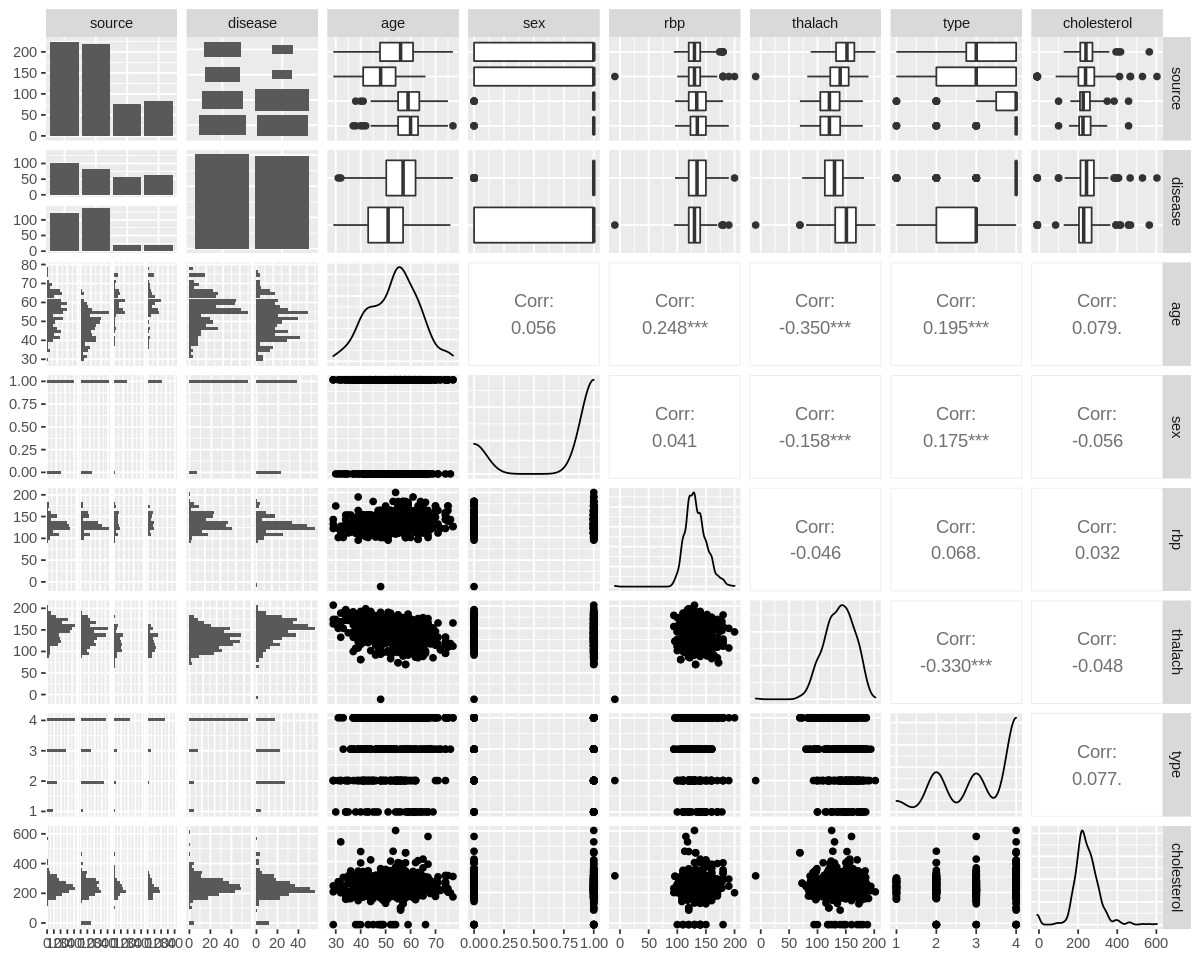

In [63]:
options(repr.plot.height = 8, repr.plot.width = 10)



heart_pairs<-ggpairs(heart_train, columns=1:8)

heart_pairs

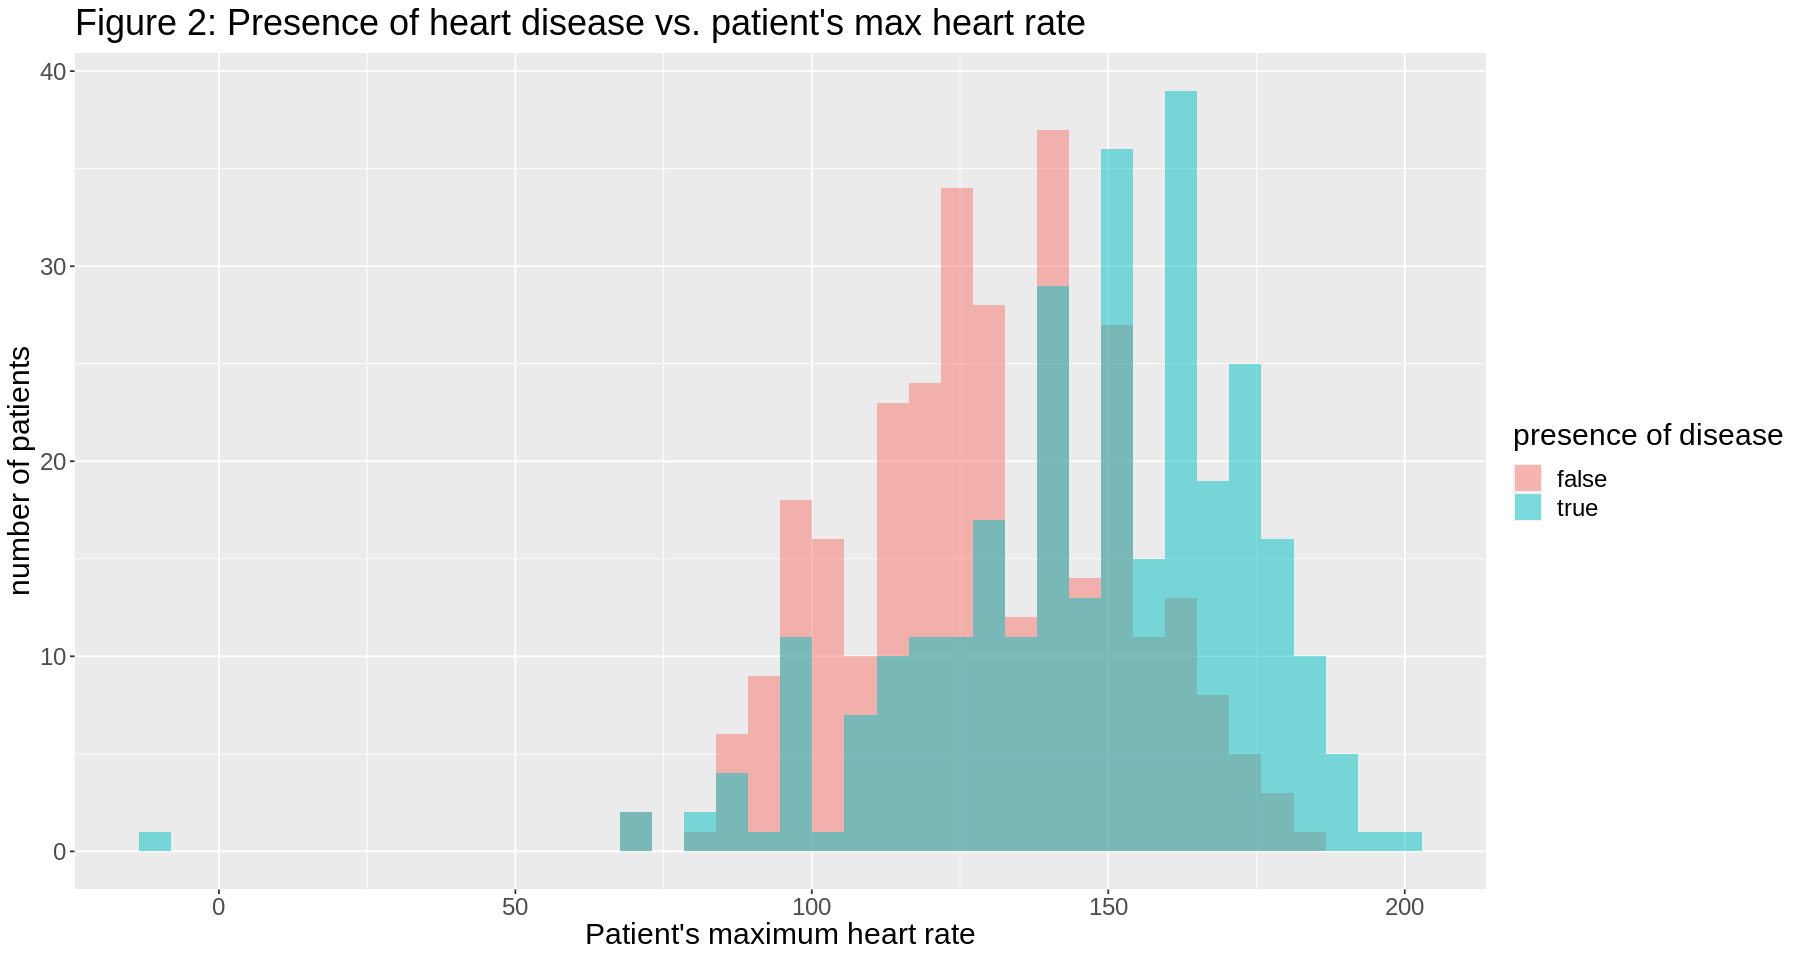

In [64]:





options(repr.plot.width = 15, repr.plot.height = 8)

thalach_dist <- ggplot(heart_train, aes(x = thalach, fill = factor(disease))) + 
                 geom_histogram(position = "identity", alpha = 0.5, bins=40) + 
                  labs(x = "Patient's maximum heart rate", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's max heart rate") + 
                  theme(text = element_text(size = 18)) 
              

thalach_dist

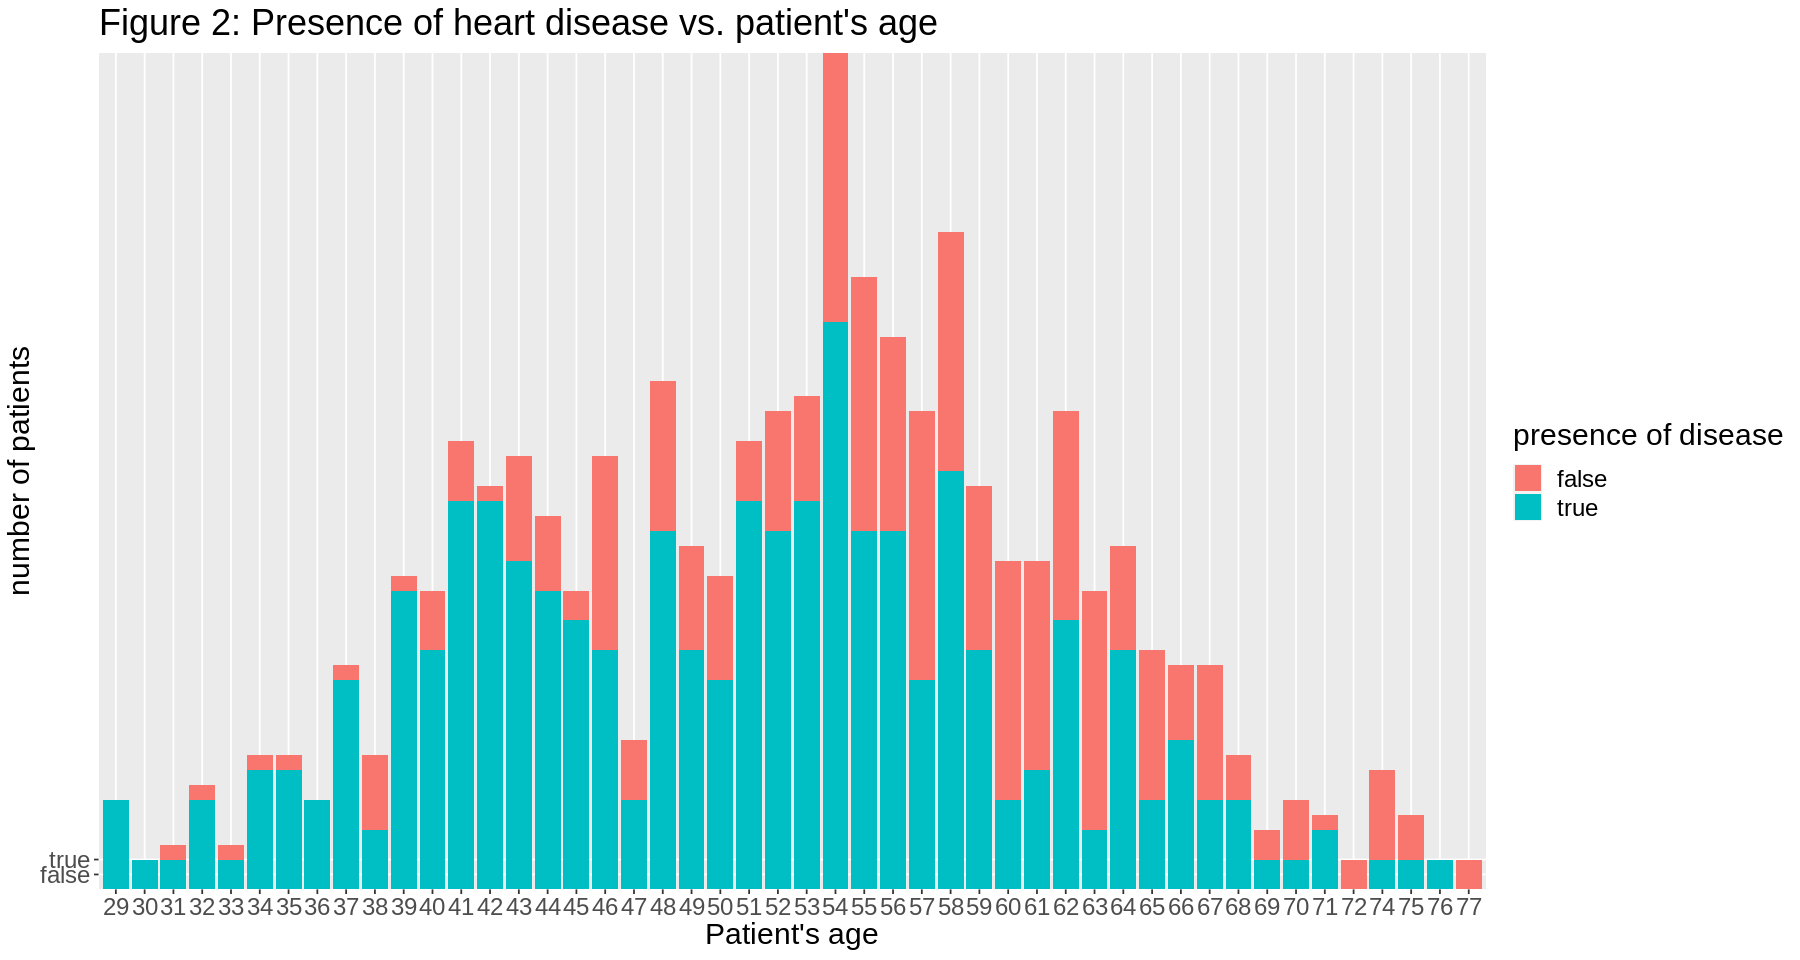

In [65]:
options(repr.plot.width = 12, repr.plot.height = 8)



options(repr.plot.width = 15, repr.plot.height = 8)
age_dist <- ggplot(heart_train, aes(x = factor(age), y = disease, fill=disease))+ 
                  geom_bar(stat = "identity") + 
                  labs(x = "Patient's age", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's age") + 
                  theme(text = element_text(size = 18)) 


     

age_dist

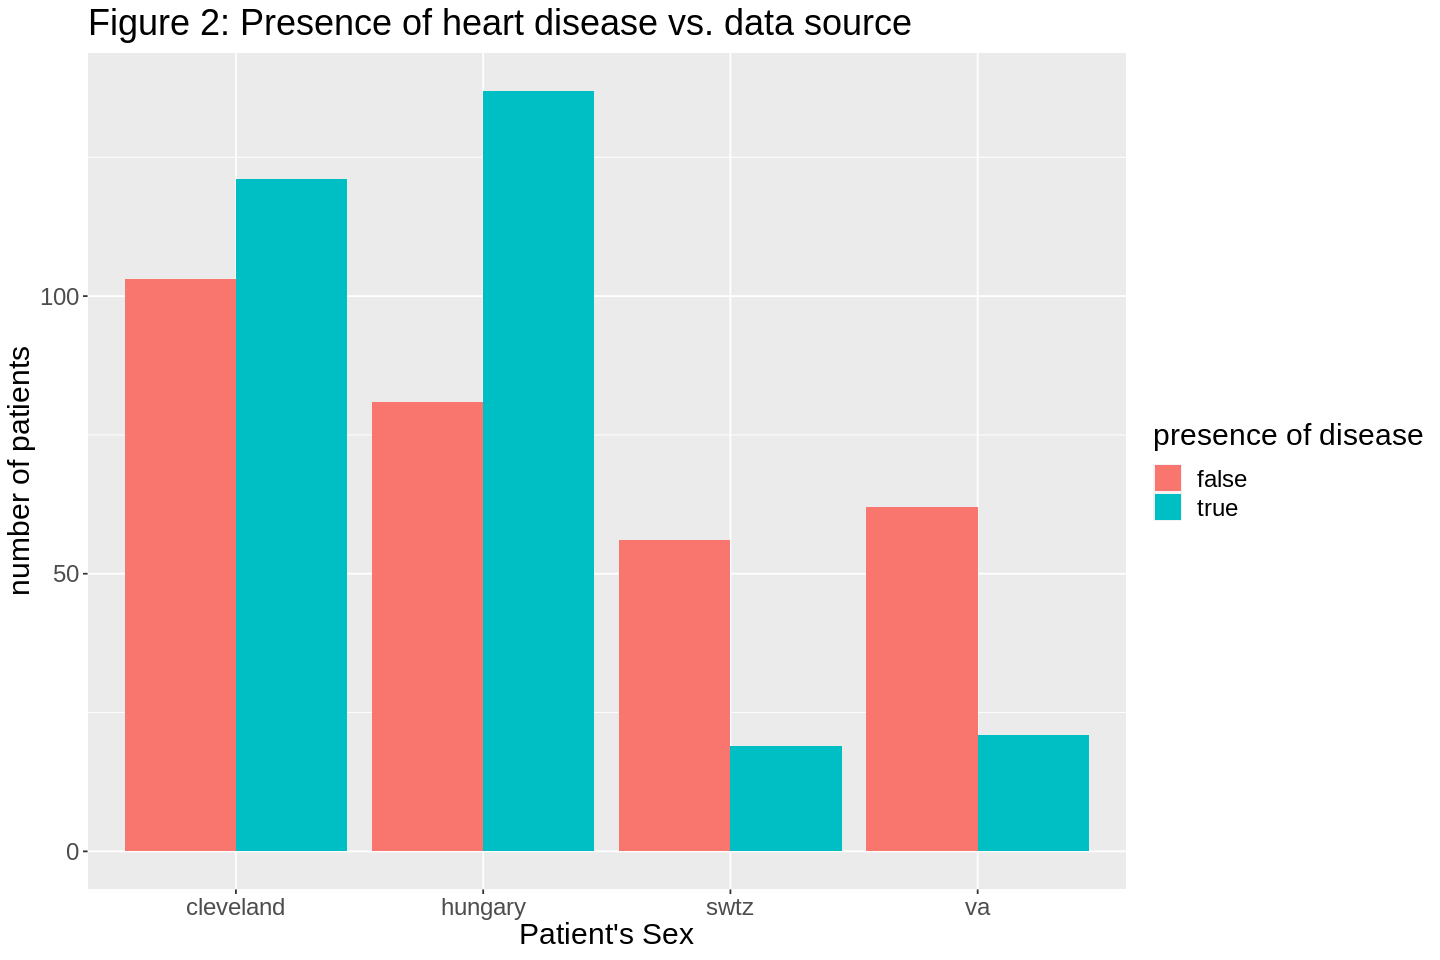

In [66]:
options(repr.plot.width = 12, repr.plot.height = 8)
source_dist <- ggplot(heart_train, aes(x = source, fill = disease)) + 
                  geom_bar(position= "dodge") + 
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. data source") + 
                  theme(text = element_text(size = 18)) 
                  

source_dist

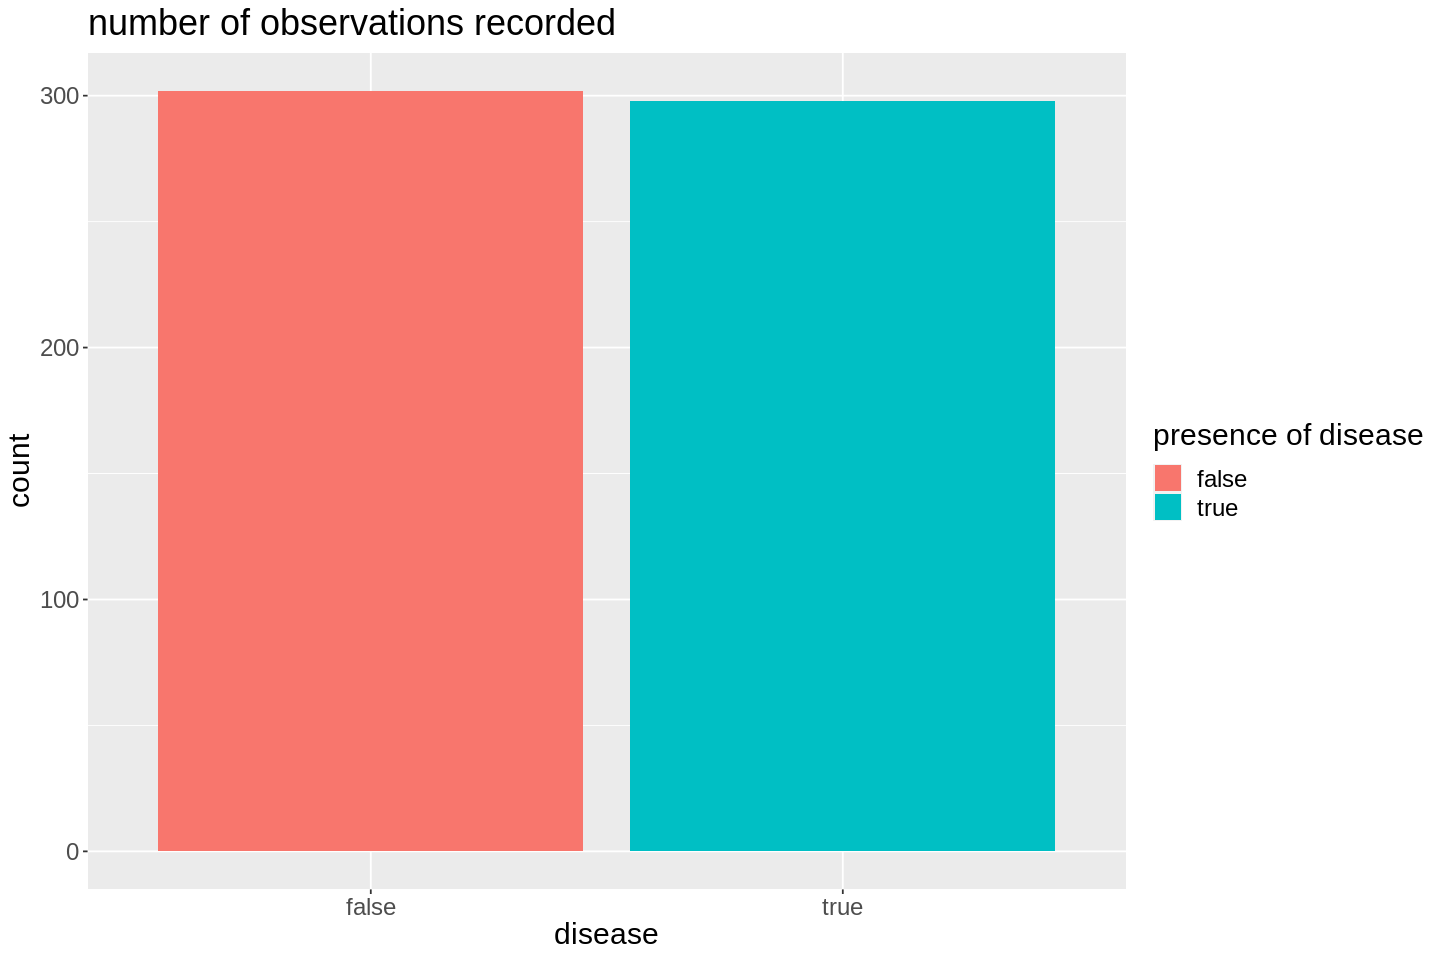

In [67]:
options(repr.plot.width = 12, repr.plot.height = 8)
disease_dist <- ggplot(heart_train, aes(x=disease,fill = disease)) + 
                  geom_bar() + 
                  labs( y = "count",fill = "presence of disease",title = "number of observations recorded") + 
                  theme(text = element_text(size = 18)) 

                  

disease_dist

[1] "Number of Female Observations:145"
[1] "Number of Male Observations:455"


<ggproto object: Class CoordPolar, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    direction: 1
    distance: function
    is_free: function
    is_linear: function
    labels: function
    modify_scales: function
    r: x
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    start: 0
    theta: y
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordPolar, Coord, gg>

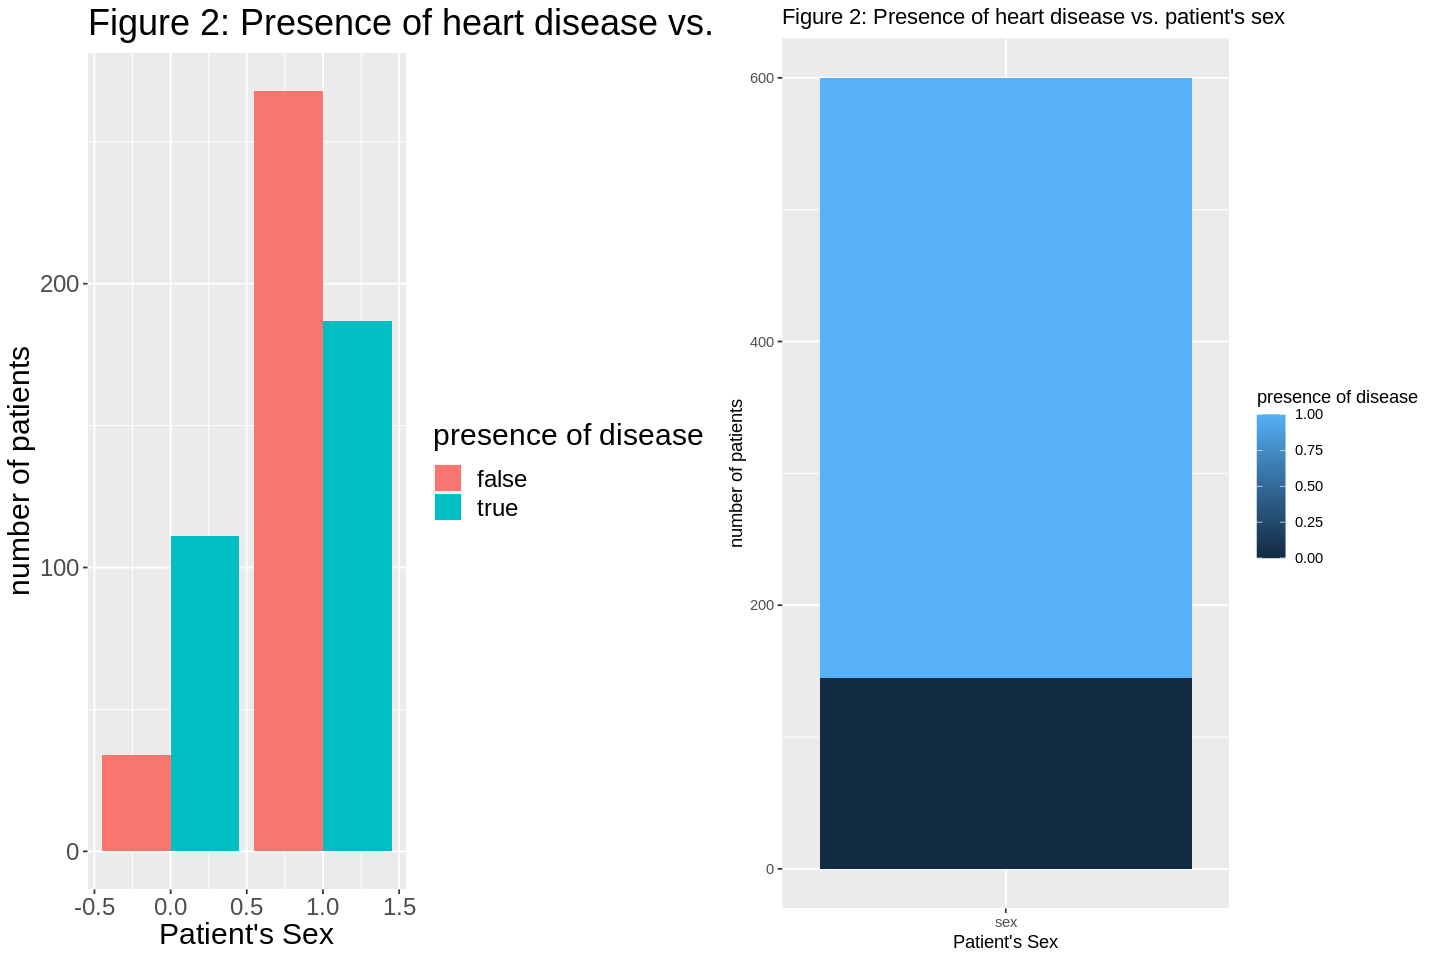

In [80]:
options(repr.plot.width = 12, repr.plot.height = 8)
sex_dist <- ggplot(heart_train, aes(x=sex, fill = disease)) + 
                  geom_bar(position= "dodge") + 
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex") + 
                  theme(text = element_text(size = 18)) 
                  

sex_num<-heart_train|>
count(sex)
print(paste("Number of Female Observations:145"))
print(paste("Number of Male Observations:455"))

sex_prop<-ggplot(sex_num, aes(x="sex", y=n, fill=sex)) +
  geom_bar(stat="identity", width=1) +
labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex")
  coord_polar("y", start=0)


grid.arrange(sex_dist, sex_prop, ncol=2)

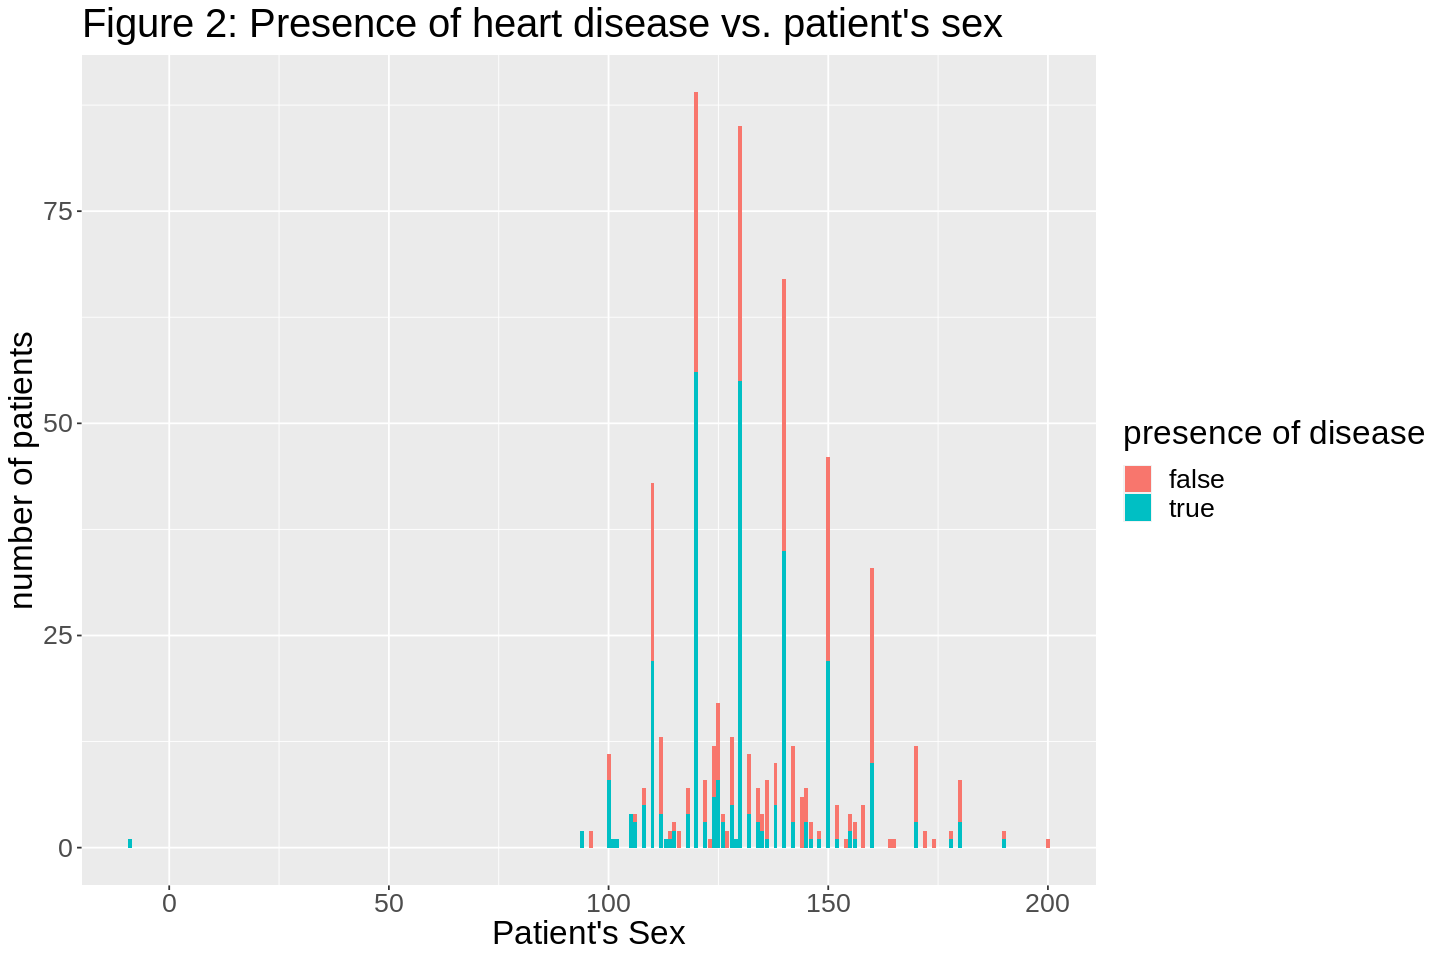

In [69]:
options(repr.plot.width = 12, repr.plot.height = 8)
rbp_dist <- ggplot(heart_train, aes(x= rbp, fill=disease)) + 
                  geom_bar()+
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex") + 
                  theme(text = element_text(size = 20)) 
rbp_dist

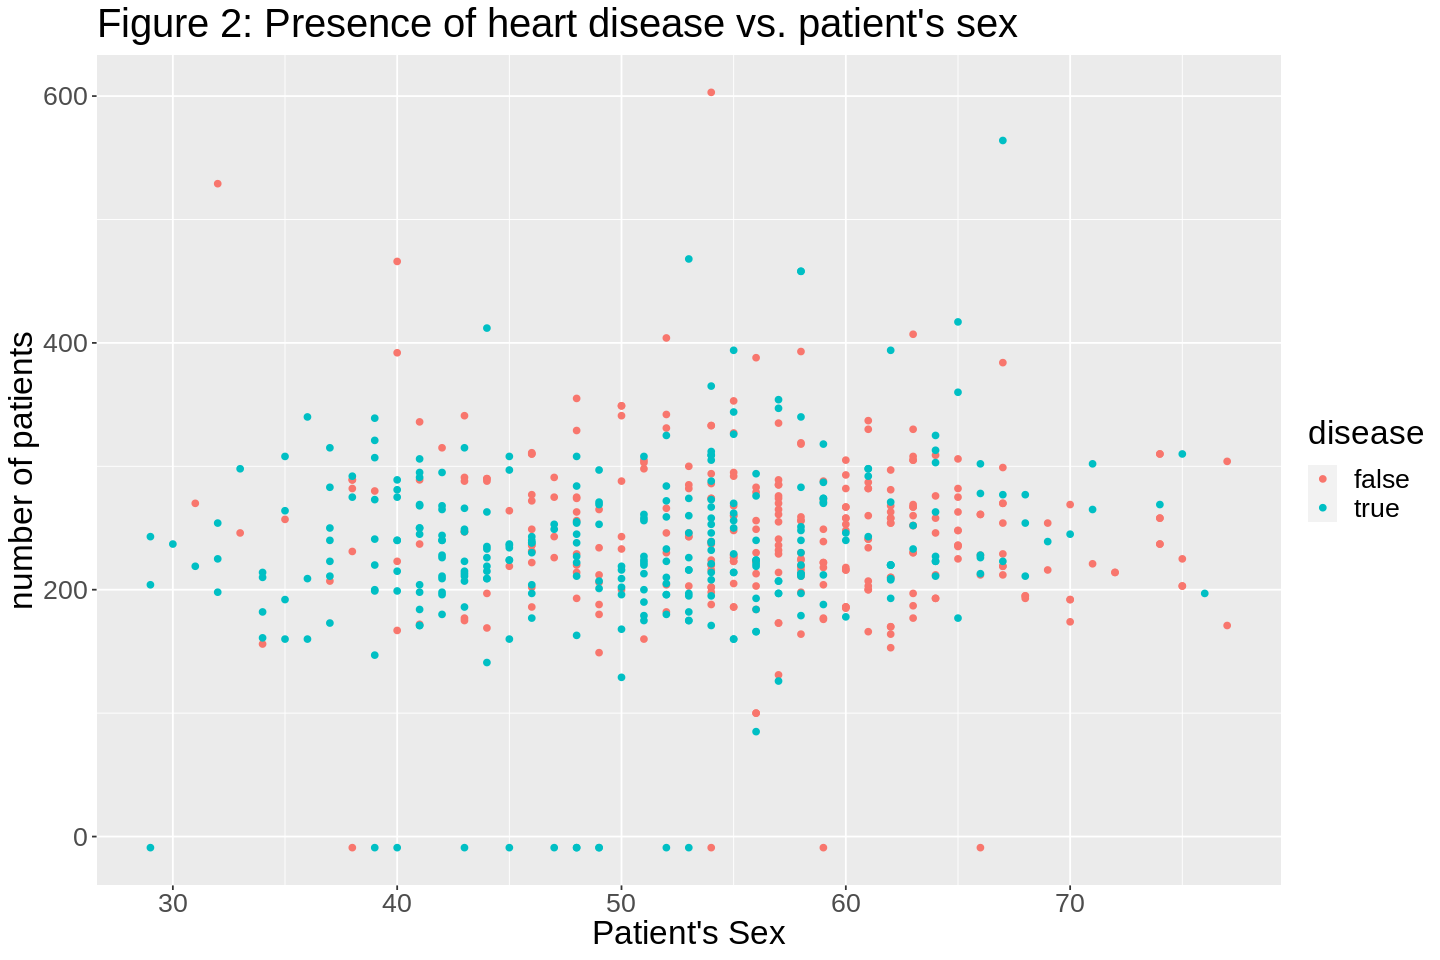

In [70]:
options(repr.plot.width = 12, repr.plot.height = 8)
chol_dist <- ggplot(heart_train, aes(x= age, y=cholesterol, color=disease)) + 
                  geom_point()+
                  labs(x = "Patient's Sex", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. patient's sex") + 
                  theme(text = element_text(size = 20)) 
chol_dist

In [85]:

#plot relationship
heart_train2<-heart_train|>
mutate(type=as.factor(type))
heart_train2$type<- factor(
mydata$v1 <- factor(heart_train2$type,
levels = c(1,2,3,4),
labels = c("typical angina", "atypical angina", "non-anginal pain","asymptomatic"))
    

options(repr.plot.width = 12, repr.plot.height = 8)
type_dist <- ggplot(heart_train, aes(x = type, fill = disease)) + 
                  geom_bar(position= "dodge") + 
                  labs(x = "Type of chest pain", y = "number of patients",fill = "presence of disease",title = "Figure 2: Presence of heart disease vs. Chest pain") + 
                  theme(text = element_text(size = 18)) 
type_dist

ERROR: Error in parse(text = x, srcfile = src): <text>:11:1: unexpected symbol
10: 
11: options
    ^


In [84]:
##predictive analysis

To built the recipe, rank was selected as the target variable while the predicting variables were specified as aces, rank points, age and draw size. The variables were scaled and centered to ensure that their mean was zero and their standard deviation was one. Without the standardization process, our predictors will have unequal effects on our classifier which would decrease the prediction accuracy of our model.

In [73]:
#creating recipe
recipe<- recipe(disease ~age+ sex+ rbp+thalach+type, data = heart_train) |>
step_scale(all_predictors())|>
    step_center(all_predictors())




Cross validation helps us choose the k-value to maximizes the prediction accuracy of our model. The 5-fold method randomly divides the training dataset into 5 evenly sized subsets of data. One of the subsets (or folds) is used for validation while the remaining 4 compose the training set. The process is repeated 5 times, using all subsets to calulate the accuracy of each K-value on each subset.

In [74]:
set.seed(4321)


#Code Source: the following code was taken from " DSCI_100-Group-project" by Hannah Martin, and it was modified to suit this project 

# preform cross-validation
data_vfold <- vfold_cv(heart_train, v = 5, strata = disease)
#tune model and fit to workflow
knn_tune<- nearest_neighbor(weight_func ="rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

#create data frame with K = [5, 10, 15, ... 100]
gridvals <- tibble(neighbors = seq(from = 5, to = 100, by = 5))
print("Table 1: Neighbors Used for Tuning the Model")
gridvals

[1] "Table 1: Neighbors Used for Tuning the Model"


neighbors
<dbl>
5
10
15
20
25
30
35
40
45


Seting the engine to "kknn" and the mode to "classification" specified the type of model we're building; K-nn classification. By setting the neighbors to "tune()" opposed to a specific number allows multiple k-values to be tested as once instead of just one. Our model tested every fifth value from 0-100 which provided a large range of K-values without drastically increasing the computation time.

The workflow is used to combine the recipe, model specificaton, model tuning and to collect the metrics. The tune_grid function was used to determine the accuracies of our model (in addition to mean and standard deviation) while the collect_metrics function collected these values together. The mean value corresponds to the estimated model accuracy while the standard error measures the magnitute of uncertainty surrounding the mean,.

[1] "Accuracy metrics arranged in descending order for various K-Values"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
30,accuracy,binary,0.7781397,5,0.02355697,Preprocessor1_Model06
20,accuracy,binary,0.7780977,5,0.02772407,Preprocessor1_Model04
25,accuracy,binary,0.7714168,5,0.03030319,Preprocessor1_Model05
15,accuracy,binary,0.7697919,5,0.02374014,Preprocessor1_Model03
10,accuracy,binary,0.7681388,5,0.02785384,Preprocessor1_Model02
40,accuracy,binary,0.7664445,5,0.02417218,Preprocessor1_Model08
35,accuracy,binary,0.7647779,5,0.02401961,Preprocessor1_Model07
85,accuracy,binary,0.7632637,5,0.02469854,Preprocessor1_Model17
60,accuracy,binary,0.7632359,5,0.02567657,Preprocessor1_Model12


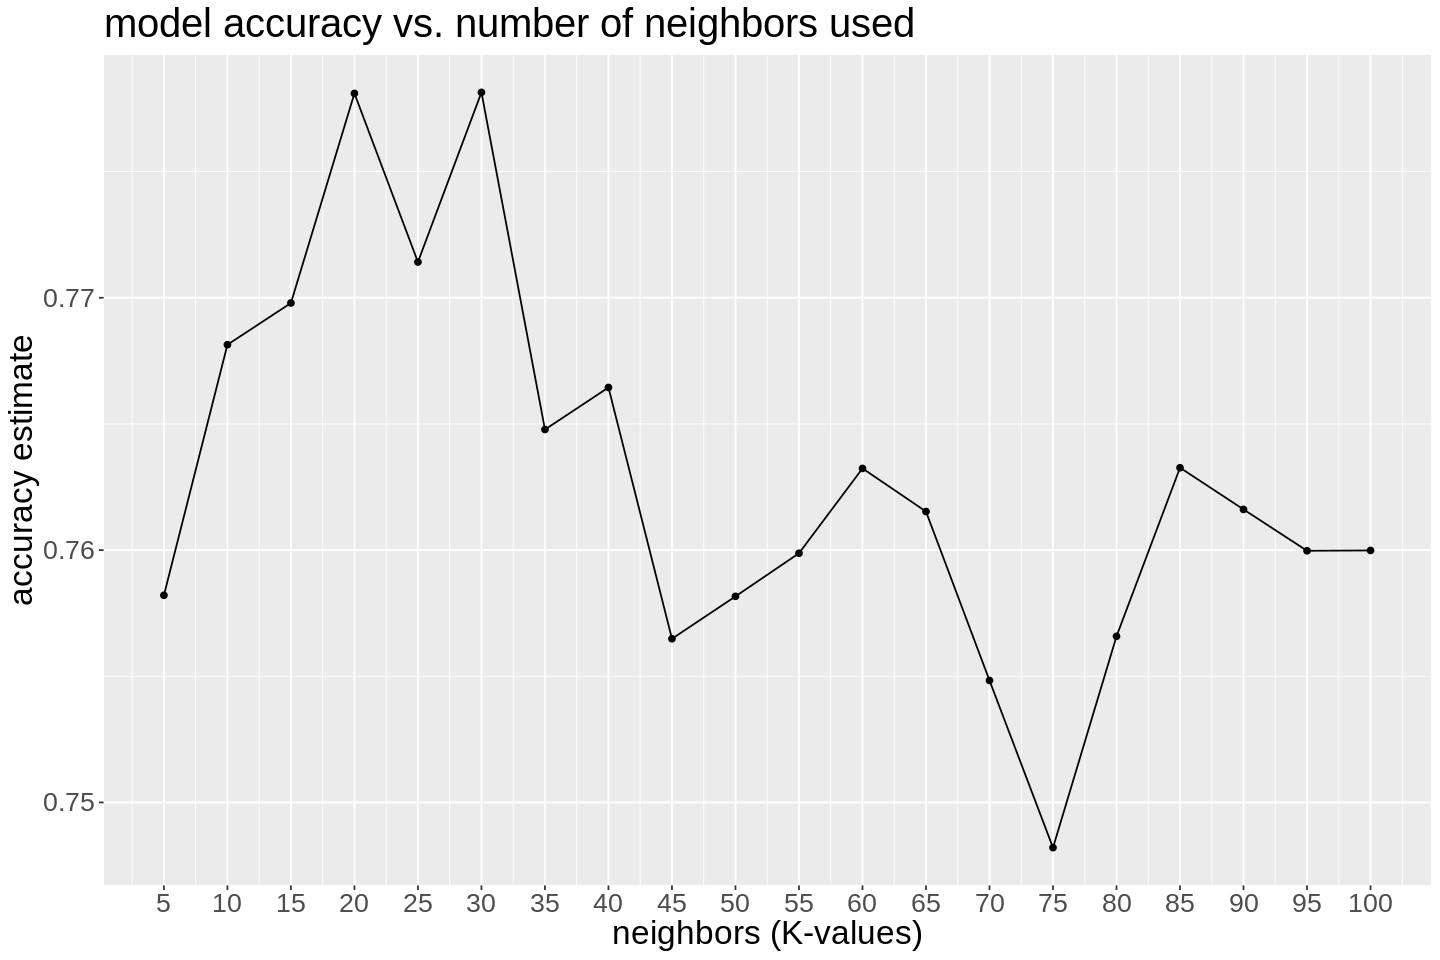

In [75]:
#Code Source: the following code was taken from " DSCI_100-Group-project" by Hannah Martin, and it was modified to suit this project 

set.seed(4321)

#collect tuning results

match_tune_res <- workflow() |>
                    add_recipe(recipe) |> 
                    add_model(knn_tune)|> 
                    tune_grid(resamples = data_vfold, grid = gridvals)|>
                    collect_metrics()

#plotting accuracy vs. number of neighbours

accuracies <- match_tune_res |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean))
print("Accuracy metrics arranged in descending order for various K-Values")
accuracies

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "neighbors (K-values)", y = "accuracy estimate", title = "model accuracy vs. number of neighbors used") +
    scale_x_continuous(breaks = seq(5, 100, by = 5)) +    
    theme(text = element_text(size = 20))
accuracy_versus_k

To visualize how the model accuracy varies across the various K-values, the accuracy metrics obtained from tuning where graphed against the K-values. In general, the accuracy of our model increased as K got larger, with a peak occuring at K=30 .Now that we know the most accurate K value, we can rebuild and retrain our model using k=30in our workflow.

In [76]:

# Retrain model
best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 30)|>
                    set_engine("kknn")|>
                    set_mode("classification")

# Combine model in workflow
best_fit <- workflow()|>
            add_recipe(recipe) |>
            add_model(best_model) |>
            fit(data = heart_train)

In [77]:

# Make predictions
predict <- best_fit|> 
    predict(heart_test)|> 
    bind_cols(heart_test)

prediction_accuracy <- predict|>
    metrics(truth = disease, estimate = .pred_class)|> 
    filter(.metric == "accuracy")
print("Table 6: Prediction Accuracy for K-nn classification with 30 Neighbours")
prediction_accuracy






[1] "Table 6: Prediction Accuracy for K-nn classification with 30 Neighbours"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8059701


The fit and predict functions were used to predict testing set labels with our trained model. Then, the metrics function gave us a summary on the prediction accuracy of our model. The table returned by this function gave us an accuracy value of approximately 80.6%, meaning that our model is 80.6% accurate when predicting labels in the testing set. We can find more information on the predicted testing set labels by building a confusion matrix.

In [78]:
conf_matrix <- predict|>
    conf_mat(truth = disease, estimate = .pred_class)
print("Table 7: Confusion Matrix for K-nn classification with 30 Neighbours")
conf_matrix

[1] "Table 7: Confusion Matrix for K-nn classification with 30 Neighbours"


          Truth
Prediction false true
     false    87   25
     true     14   75

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



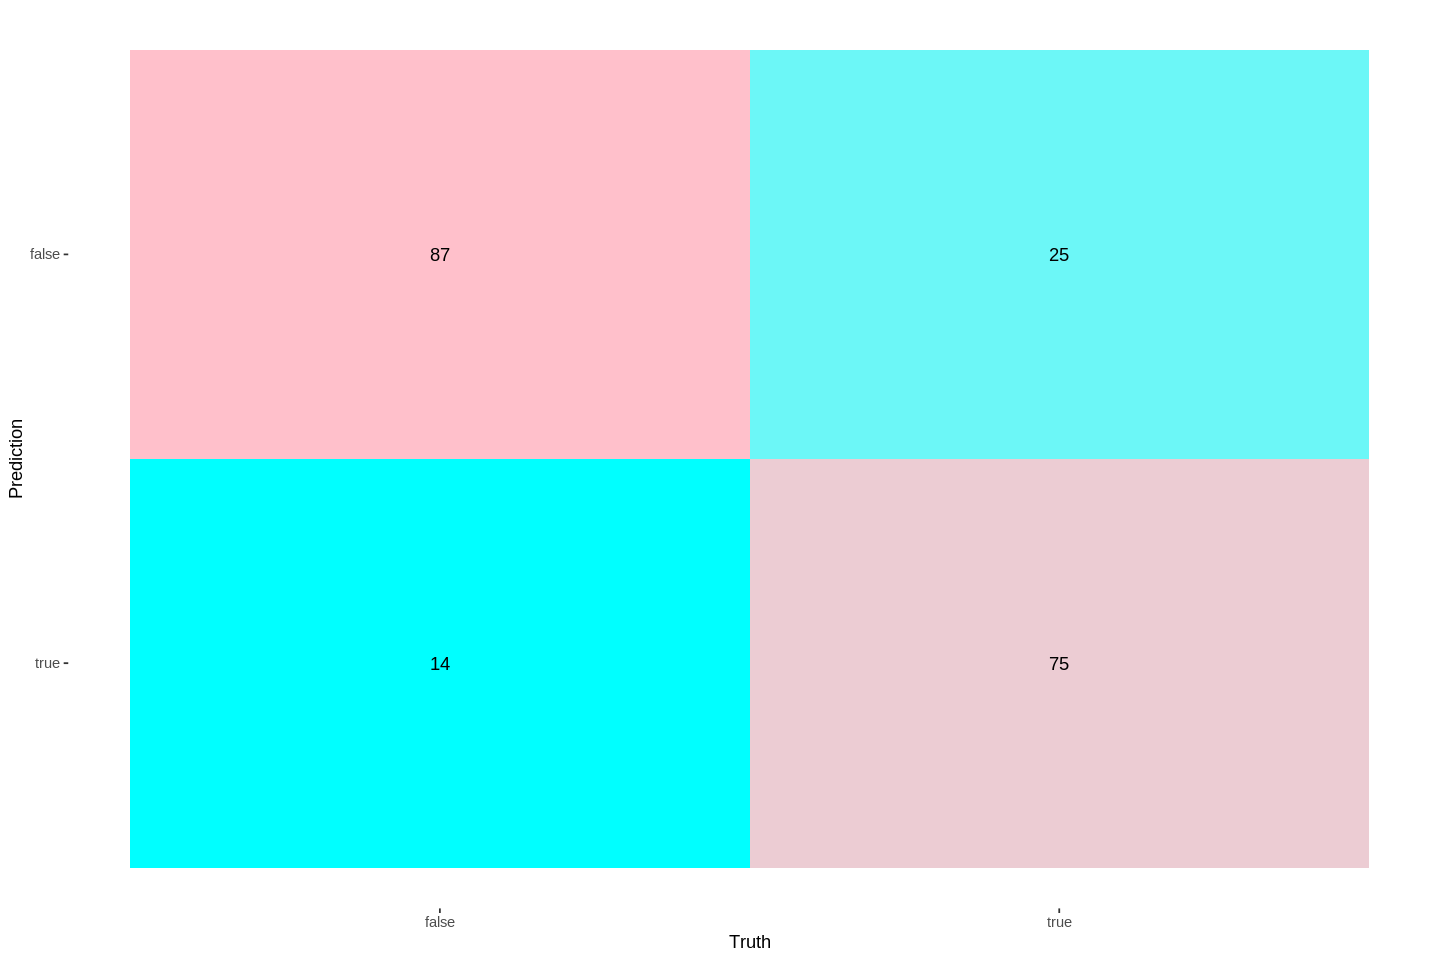

In [79]:
conf_plot<-autoplot(conf_matrix,type = "heatmap") +
  scale_fill_gradient(low = "cyan", high = "pink")
print("Table 7: Visualization of Confusion Matrix for K-nn classification with 30 Neighbours")
conf_plot

##discussion

Using the metrics function, we found that the classification model (using k=30) was able to predict the class of an observation in the testing set correctly 80.6% of the time. The confusion matrix found that the model predicted 80.2% of the TRUE values in the testing set correctly, however only 73% of the TRUE observations were correct. Additionally, the model predicted 75.5% of the FALSE values in the testing set and 82.2% of the FALSE observations made were correct.

Our model made a total of 201 predictions on the testing set, predicting “false” 110 times and “true” 91 times. This means that the model predicted “false” 54.7% of the time and “true” 45.3% of the time. While this correctly corresponds to the approximate ratio of false and true observations found in the training set, this result is not ideal considering the purpose of our model. Since the goal of our model is to allow for early diagnosis of heart conditions in individuals based on their personal and medical history, we want our model to be biased towards predicting “true” observations. If our model were to be used to help doctors know what patients are at risk, we would rather the model predict an observation as “true” when it’s actually “false” (predict that the patient has a disease when they actually dont) compared to predicting “false” when it’s actually “true” (predict that the patient has no disease when they actually do). If the model predicts that the patient has a disease when they actually don’t, there are few consequences of this false prediction. If the model predicts that the patient is disease free when they actually have a heart condition, this can have very extreme consequences since their condition could go untreated. In our preliminary data analysis, we found that the original dataset contained 403 “false” observations (50.3%) and 398 “true” observations (49.7%). Thus, we would want a minimum of 49.7% of our model predictions to be “true”. If this condition is met (or preferably exceeded) it could help indicate that our model is biased towards predicting “true”.

The accuracy of our model could be impacted by a variety of factors such as the selected predictors. When building the model, we selected variables that we saw had logical connection to our target variable. We then tested and confirmed this correlation in our preliminary analysis. However, our interpretation of a logical connection may not be the same as our model’s. This means that we not have selected the most relevant predictors when building our model. One way to improve this would be by employing forward selection, which selects only the predictors that allow for the highest level of accuracy. Forward selection starts with a model that has no predictors, then it repeats the following steps until all available predictors are analyzed: Adds an unused predictor to the model, preforms cross validation on the model, updates the model by either adding or removing the predict
or to maximize cross-validation accuracy.

The impact of our project could be life-saving. It can reduce the time, effort, and resources that it takes to diagnose an individual with a heart condition just using data on their attributes. By further improving our model, we could make our predictions on the presence of heart conditions even more accurate, saving even more lives. This would allow medical practitioners as well as patients to take the necessary steps to protect their health as soon as possible. While our model can be applied to help identify the risk of heart disease in an individual, the concepts used can be applied to countless other conditions and situations. For example, the same strategy can be applied to datasets containing attributes from patients tested for brain tumors to predict an individual’s risk of developing a brain tumor. The same strategy and approach could be applied to countless other diagnosees and save countless lives through early diagnoses.Using the metrics function, we found that the classification model (using k=50) was able to predict the class of an observation in the testing set correctly 80.6% of the time. The confusion matrix found that the model predicted 80.2% of the TRUE values in the testing set correctly, however only 73% of the TRUE observations were correct. Additionally, the model predicted 75.5% of the FALSE values in the testing set and 82.2% of the FALSE obervations made were correct. 

##CITATIONS

Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1989, May 30). Heart Disease Data Set. Retrieved from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/. 

Martin, H. (n.d.). DSCI_100-group-project/dsci_100_project.ipynb at Main · Hmartin11/DSCI_100-Group-project. GitHub. Retrieved from https://github.com/hmartin11/DSCI_100-Group-Project/blob/main/DSCI_100_project.ipynb 

Timbers, T., Campbell, T., &amp; Lee, M. (2022). Data science: A First Introduction. https://doi.org/10.1201/9781003080978 